# Covid-19 - Ontario

### By Alexandre Dietrich

#### April 05, 2020

The datasets were downloaded from the o official Ontario site. 

https://data.ontario.ca/dataset?keywords_en=COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset: Confirmed positive cases of COVID19 in Ontario

In [2]:
df = pd.read_csv("conposcovidloc.csv")
df.head()

,ROW_ID,ACCURATE_EPISODE_DATE,Age_Group,CLIENT_GENDER,CASE_ACQUISITIONINFO,OUTCOME1,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-03-07,40s,MALE,Neither,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
1,2,2020-03-08,20s,MALE,Neither,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2,3,2020-03-10,40s,FEMALE,Neither,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
3,4,2020-03-11,50s,FEMALE,Neither,Resolved,Middlesex-London Health Unit,50 King Street,London,N6A 5L7,www.healthunit.com,42.981468,-81.254016
4,5,2020-03-12,30s,FEMALE,Neither,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 13 columns):
ROW_ID                       3630 non-null int64
ACCURATE_EPISODE_DATE        3630 non-null object
Age_Group                    3630 non-null object
CLIENT_GENDER                3630 non-null object
CASE_ACQUISITIONINFO         3630 non-null object
OUTCOME1                     3630 non-null object
Reporting_PHU                3630 non-null object
Reporting_PHU_Address        3630 non-null object
Reporting_PHU_City           3630 non-null object
Reporting_PHU_Postal_Code    3630 non-null object
Reporting_PHU_Website        3630 non-null object
Reporting_PHU_Latitude       3630 non-null float64
Reporting_PHU_Longitude      3630 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 368.8+ KB


In [4]:
df.columns = ['id', 'date', 'agegrp', 'gender', 'info', 
              'outcome', 'phu', 'address', 'city', 'zipcode', 'website', 'latitude', 'longitude']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 13 columns):
id           3630 non-null int64
date         3630 non-null object
agegrp       3630 non-null object
gender       3630 non-null object
info         3630 non-null object
outcome      3630 non-null object
phu          3630 non-null object
address      3630 non-null object
city         3630 non-null object
zipcode      3630 non-null object
website      3630 non-null object
latitude     3630 non-null float64
longitude    3630 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 368.8+ KB


In [5]:
df['date'].value_counts()

2020-03-30    206
2020-03-20    205
2020-03-23    192
2020-03-26    183
2020-03-31    182
2020-03-28    176
2020-03-18    171
2020-03-27    169
2020-03-24    164
2020-03-17    163
2020-03-25    155
2020-03-16    152
2020-03-19    149
2020-03-21    148
2020-03-22    140
2020-03-29    134
2020-04-01    104
2020-03-15    103
2020-03-14     95
2020-03-13     83
2020-03-12     83
2020-03-11     71
2020-03-10     70
2020-04-03     66
2020-04-02     59
2020-03-09     49
2020-03-08     32
2020-03-07     22
2020-03-06     20
2020-03-05     14
2020-03-02     11
2020-03-03     10
2020-03-04      7
2020-03-01      7
2020-02-20      4
2020-02-28      4
2020-02-23      3
2020-02-26      3
2020-02-29      3
2020-02-14      2
2020-02-22      2
2020-02-25      2
2020-02-24      2
2020-01-21      1
2020-01-25      1
2020-02-05      1
2020-02-21      1
2020-01-22      1
2020-02-15      1
2020-02-16      1
2020-02-10      1
2020-02-27      1
2020-01-24      1
Name: date, dtype: int64

In [6]:
cityname = df['city'].value_counts()
cityname

Toronto             845
Mississauga         443
Newmarket           401
Ottawa              309
Whitby              194
Waterloo            140
Hamilton            137
Windsor             120
Oakville            114
Thorold             110
London              110
Barrie               71
Guelph               70
Port Hope            70
Point Edward         63
Simcoe               54
Kingston             48
Brockville           47
Brantford            46
Peterborough         41
Cornwall             34
Timmins              28
Sudbury              25
Belleville           17
Stratford            16
St. Thomas           16
Owen Sound           15
Thunder Bay          11
Chatham              10
Sault Ste. Marie      7
Pembroke              7
Kenora                4
North Bay             4
New Liskeard          3
Name: city, dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 13 columns):
id           3630 non-null int64
date         3630 non-null datetime64[ns]
agegrp       3630 non-null object
gender       3630 non-null object
info         3630 non-null object
outcome      3630 non-null object
phu          3630 non-null object
address      3630 non-null object
city         3630 non-null object
zipcode      3630 non-null object
website      3630 non-null object
latitude     3630 non-null float64
longitude    3630 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 368.8+ KB


In [8]:
city = df.groupby(['latitude', 'longitude'])['city'].count()
lat = city.index.get_level_values('latitude').to_numpy()
long = city.index.get_level_values('longitude').to_numpy()
size = city.values
size

array([120,  10,  16,  54, 110,  63, 110,  46, 137,  16, 114, 140,  70,
       443, 845, 194,  70, 401,  17,  48,  41,  71,  15,  47,  34, 309,
         7,   4,  25,   7,   3,  11,  28,   4])

In [9]:
cityname = cityname.head(11)
cityname = cityname.sort_values(ascending=True)
cityname

Thorold        110
London         110
Oakville       114
Windsor        120
Hamilton       137
Waterloo       140
Whitby         194
Ottawa         309
Newmarket      401
Mississauga    443
Toronto        845
Name: city, dtype: int64

In [10]:
outcome = df[df['city'] == 'Toronto'].groupby('outcome')['outcome'].count()
lastdate = df[df['city'] == 'Toronto']['date'].max().date()
lastdate

datetime.date(2020, 4, 2)

In [11]:
agegrp = df[(df['date'] >= '2020-03-01') & (df['city'] == 'Toronto')].groupby('agegrp')['agegrp'].count()
agegrp

agegrp
20s        140
30s        167
40s        138
50s        128
60s        125
70s         62
80s         42
90s         16
<20         11
Unknown      1
Name: agegrp, dtype: int64

In [12]:
cumulative = df[(df['date'] >= '2020-03-01') & (df['city'] == 'Toronto')].groupby('date')['date'].count().cumsum()

In [13]:
byday = df[(df['date'] >= '2020-03-01') & (df['city'] == 'Toronto')].groupby('date')['date'].count()

In [14]:
outcomeOnt = df.groupby('outcome')['outcome'].count()
lastdateOnt = df['date'].max().date()
lastdateOnt

datetime.date(2020, 4, 3)

In [15]:
agegrpOnt = df[df['date'] >= '2020-03-01'].groupby('agegrp')['agegrp'].count()
agegrpOnt

agegrp
20s        487
30s        533
40s        592
50s        715
60s        574
70s        312
80s        206
90s         81
<20         93
Unknown      2
Name: agegrp, dtype: int64

In [16]:
cumulativeOnt = df[df['date'] >= '2020-03-01'].groupby('date')['date'].count().cumsum()

In [17]:
bydayOnt = df[df['date'] >= '2020-03-01'].groupby('date')['date'].count()

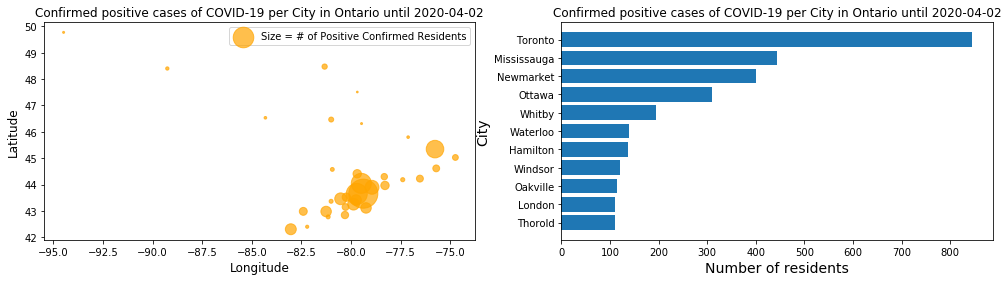

In [54]:
f = plt.figure(figsize=(17,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.scatter(long, lat, s=size, alpha=0.7, color='orange', label='Size = # of Positive Confirmed Residents')
ax1.set_xlabel('Longitude', fontsize=12)  # Add an x-label to the axes.
ax1.set_ylabel('Latitude', fontsize=12)  # Add a y-label to the axes.
ax1.set_title('Confirmed positive cases of COVID-19 per City in Ontario until ' + str(lastdate), fontsize=12);  # Add a title to the axes.
ax1.legend()

ax2.barh(cityname.index, cityname.values) #, color=['red', 'yellow', 'green'])
ax2.set_xlabel('Number of residents', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('City', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Confirmed positive cases of COVID-19 per City in Ontario until ' + str(lastdate), fontsize=12);  # Add a title to the to the axes

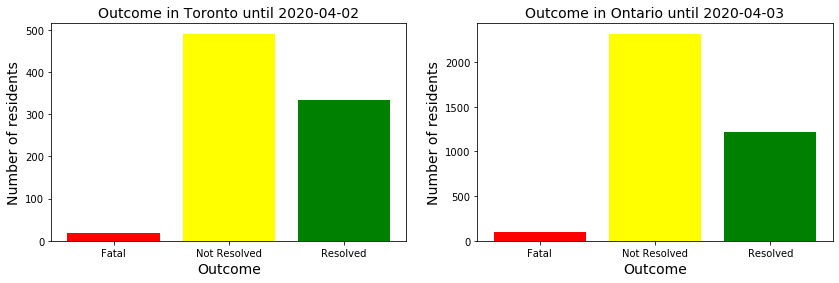

In [19]:
#plt.figure(figsize=(12,4))
#fig, (ax1, ax2) = plt.subplots(1, 2)
f = plt.figure(figsize=(14,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.bar(outcome.index, outcome.values, color=['red', 'yellow', 'green'])
ax1.set_xlabel('Outcome', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Outcome in Toronto until ' + str(lastdate), fontsize=14);  # Add a title to the axes.

ax2.bar(outcomeOnt.index, outcomeOnt.values, color=['red', 'yellow', 'green'])
ax2.set_xlabel('Outcome', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Outcome in Ontario until ' + str(lastdateOnt), fontsize=14);  # Add a title to the axes.

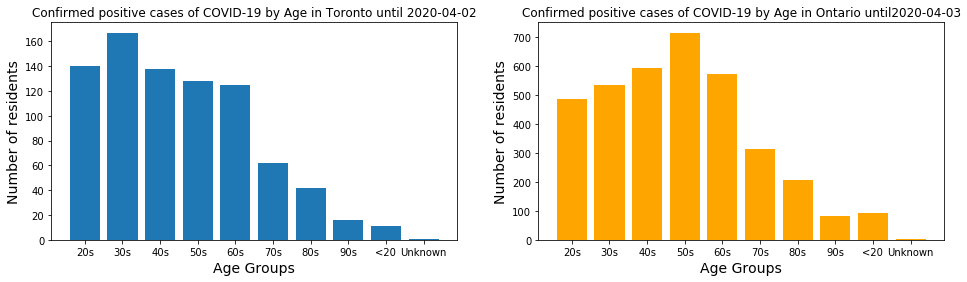

In [68]:
f = plt.figure(figsize=(16,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.bar(agegrp.index, agegrp.values) #, color=['red', 'yellow', 'green'])
ax1.set_xlabel('Age Groups', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Confirmed positive cases of COVID-19 by Age in Toronto until ' + str(lastdate), fontsize=12);  # Add a title to the axes.

ax2.bar(agegrpOnt.index, agegrpOnt.values, color='orange')
ax2.set_xlabel('Age Groups', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Confirmed positive cases of COVID-19 by Age in Ontario until' + str(lastdateOnt), fontsize=12);  # Add a title to the axes.

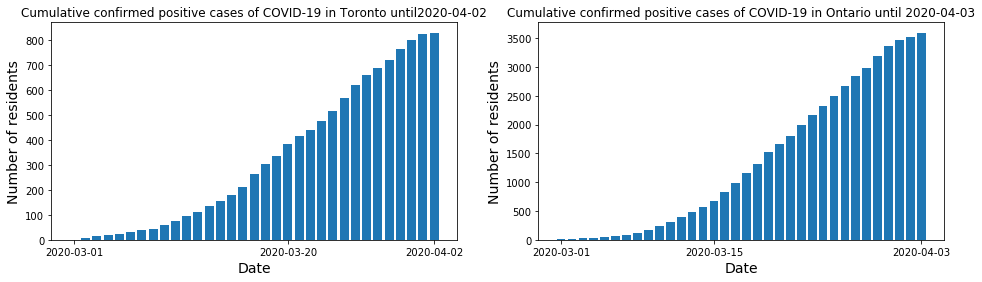

In [63]:
xticks = ['2020-03-01', '2020-03-20', lastdate]
xticksOnt = ['2020-03-01', '2020-03-20', lastdateOnt]

f = plt.figure(figsize=(16,4))


ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

xticksOnt = ['2020-03-01', '2020-03-15', lastdateOnt]

ax1.bar(cumulative.index, cumulative.values) #, color=['red', 'yellow', 'green'])
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Cumulative confirmed positive cases of COVID-19 in Toronto until' + str(lastdate), fontsize=12)  # Add a title to the axes.
ax1.set_xticks(xticks);

ax2.bar(cumulativeOnt.index, cumulativeOnt.values) #, color=['red', 'yellow', 'green'])
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Cumulative confirmed positive cases of COVID-19 in Ontario until ' + str(lastdateOnt), fontsize=12)  # Add a title to the axes.
ax2.set_xticks(xticksOnt);

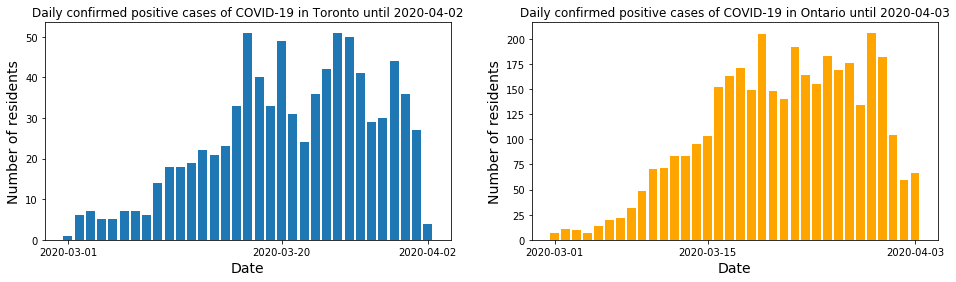

In [69]:
f = plt.figure(figsize=(16,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.bar(byday.index, byday.values) #, color=['red', 'yellow', 'green'])
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Daily confirmed positive cases of COVID-19 in Toronto until ' + str(lastdate), fontsize=12)  # Add a title to the axes.
ax1.set_xticks(xticks);

ax2.bar(bydayOnt.index, bydayOnt.values, color='orange')
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Daily confirmed positive cases of COVID-19 in Ontario until ' + str(lastdateOnt), fontsize=12)  # Add a title to the axes.
ax2.set_xticks(xticksOnt);

## Dataset: Status of COVID-19 cases in Ontario

In [23]:
df1 = pd.read_csv("covidtesting.csv")
df1.tail()

,Reported Date,Confirmed Negative,Presumptive Negative,Under Investigation,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total patients approved for testing as of Reporting Date,Total Cases,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
55,2020-04-01,NaN,NaN,3135,NaN,1681.0,674.0,37.0,57874.0,2392.0,NaN,NaN,NaN
56,2020-04-02,NaN,NaN,2052,NaN,1909.0,831.0,53.0,62733.0,2793.0,405.0,167.0,112.0
57,2020-04-03,NaN,NaN,1245,NaN,2165.0,1023.0,67.0,66753.0,3255.0,462.0,194.0,140.0
58,2020-04-04,NaN,NaN,1336,NaN,2317.0,1219.0,94.0,71338.0,3630.0,506.0,196.0,152.0
59,2020-04-05,NaN,NaN,981,NaN,2470.0,1449.0,119.0,75046.0,4038.0,523.0,200.0,154.0


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
Reported Date                                               60 non-null object
Confirmed Negative                                          47 non-null float64
Presumptive Negative                                        12 non-null float64
Under Investigation                                         60 non-null int64
Presumptive Positive                                        25 non-null float64
Confirmed Positive                                          58 non-null float64
Resolved                                                    48 non-null float64
Deaths                                                      20 non-null float64
Total patients approved for testing as of Reporting Date    54 non-null float64
Total Cases                                                 58 non-null float64
Number of patients hospitalized with COVID-19               4 non-null float64
Number of patients in

In [25]:
df1.columns = ['date', 'confneg', 'presneg', 'underinvest', 'prespos', 'confpos', 'resolved', 'deaths', 
              'tested', 'totcases', 'numpathosp', 'numpatICU', 'numpatventil']
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
date            60 non-null object
confneg         47 non-null float64
presneg         12 non-null float64
underinvest     60 non-null int64
prespos         25 non-null float64
confpos         58 non-null float64
resolved        48 non-null float64
deaths          20 non-null float64
tested          54 non-null float64
totcases        58 non-null float64
numpathosp      4 non-null float64
numpatICU       4 non-null float64
numpatventil    4 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 6.2+ KB


In [26]:
df1['date'] = pd.to_datetime(df1['date'], infer_datetime_format=True)

In [27]:
df1.tail()

,date,confneg,presneg,underinvest,prespos,confpos,resolved,deaths,tested,totcases,numpathosp,numpatICU,numpatventil
55,2020-04-01,NaN,NaN,3135,NaN,1681.0,674.0,37.0,57874.0,2392.0,NaN,NaN,NaN
56,2020-04-02,NaN,NaN,2052,NaN,1909.0,831.0,53.0,62733.0,2793.0,405.0,167.0,112.0
57,2020-04-03,NaN,NaN,1245,NaN,2165.0,1023.0,67.0,66753.0,3255.0,462.0,194.0,140.0
58,2020-04-04,NaN,NaN,1336,NaN,2317.0,1219.0,94.0,71338.0,3630.0,506.0,196.0,152.0
59,2020-04-05,NaN,NaN,981,NaN,2470.0,1449.0,119.0,75046.0,4038.0,523.0,200.0,154.0


In [28]:
totcasesOnt = df1[df1['date'] >= '2020-03-01'][['date', 'totcases', 'tested', 'deaths', 'resolved']]
lastdateOnt1 = df1['date'].max().date()
print(lastdateOnt1)
totcasesOnt.tail()

2020-04-05


,date,totcases,tested,deaths,resolved
55,2020-04-01,2392.0,57874.0,37.0,674.0
56,2020-04-02,2793.0,62733.0,53.0,831.0
57,2020-04-03,3255.0,66753.0,67.0,1023.0
58,2020-04-04,3630.0,71338.0,94.0,1219.0
59,2020-04-05,4038.0,75046.0,119.0,1449.0


In [29]:
numpathospOnt = df1[df1['date'] >= '2020-03-31'][['date', 'numpathosp', 'numpatICU', 'numpatventil']]
numpathospOnt.tail()

,date,numpathosp,numpatICU,numpatventil
55,2020-04-01,NaN,NaN,NaN
56,2020-04-02,405.0,167.0,112.0
57,2020-04-03,462.0,194.0,140.0
58,2020-04-04,506.0,196.0,152.0
59,2020-04-05,523.0,200.0,154.0


In [30]:
confposOnt = df1[df1['date'] >= '2020-03-01'][['date', 'underinvest','confpos']]
confposOnt.tail()

,date,underinvest,confpos
55,2020-04-01,3135,1681.0
56,2020-04-02,2052,1909.0
57,2020-04-03,1245,2165.0
58,2020-04-04,1336,2317.0
59,2020-04-05,981,2470.0


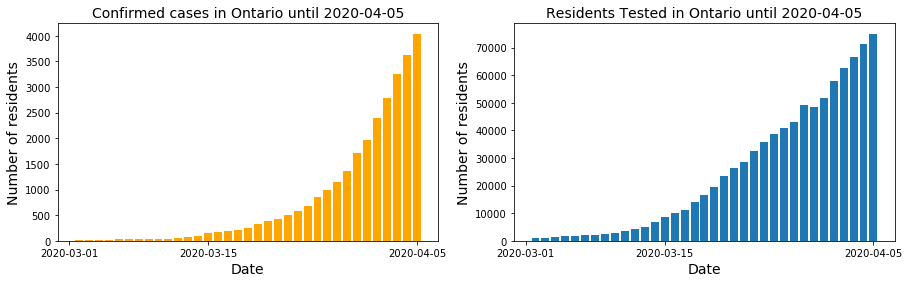

In [70]:
xticksOnt1 = ['2020-03-01', '2020-03-15', lastdateOnt1]

f = plt.figure(figsize=(15,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.bar(totcasesOnt['date'], totcasesOnt['totcases'], color='orange')
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Confirmed cases in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax1.set_xticks(xticksOnt1);

ax2.bar(totcasesOnt['date'], totcasesOnt['tested']) #, color=['red', 'yellow', 'green'])
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Residents Tested in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax2.set_xticks(xticksOnt1);

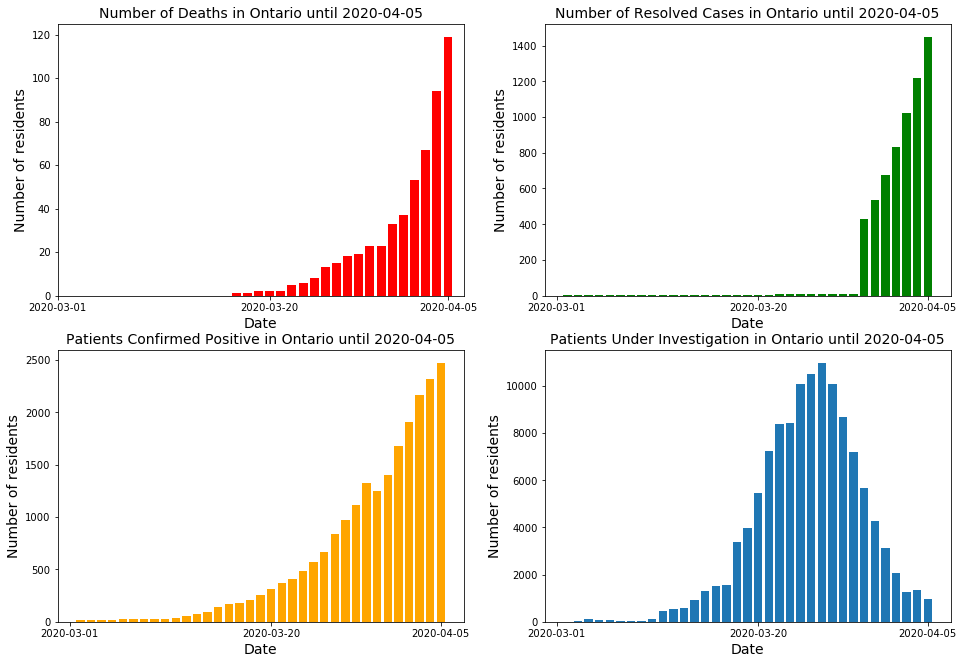

In [67]:
xticksOnt1 = ['2020-03-01', '2020-03-20', lastdateOnt1]

f = plt.figure(figsize=(16,11))

ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.bar(totcasesOnt['date'], totcasesOnt['deaths'], color='red')
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Number of Deaths in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax1.set_xticks(xticksOnt1)

ax2.bar(totcasesOnt['date'], totcasesOnt['resolved'], color='green')
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Number of Resolved Cases in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax2.set_xticks(xticksOnt1)

ax3.bar(confposOnt['date'], confposOnt['confpos'], color='orange')
ax3.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax3.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax3.set_title('Patients Confirmed Positive in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax3.set_xticks(xticksOnt1)

ax4.bar(confposOnt['date'], confposOnt['underinvest']) #, color=['red', 'yellow', 'green'])
ax4.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax4.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax4.set_title('Patients Under Investigation in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax4.set_xticks(xticksOnt1);

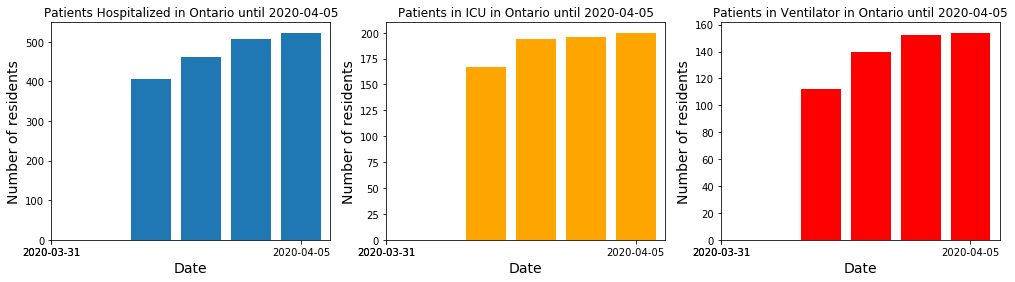

In [47]:
xticksOnt1 = ['2020-03-31', '2020-03-31', lastdateOnt1]

f = plt.figure(figsize=(17,4))

ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax1.bar(numpathospOnt['date'], numpathospOnt['numpathosp'])
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Patients Hospitalized in Ontario until ' + str(lastdateOnt1), fontsize=12);  # Add a title to the axes.
ax1.set_xticks(xticksOnt1);

ax2.bar(numpathospOnt['date'], numpathospOnt['numpatICU'], color='orange')
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Patients in ICU in Ontario until ' + str(lastdateOnt1), fontsize=12);  # Add a title to the axes.
ax2.set_xticks(xticksOnt1);

ax3.bar(numpathospOnt['date'], numpathospOnt['numpatventil'], color='red')
ax3.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax3.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax3.set_title('Patients in Ventilator in Ontario until ' + str(lastdateOnt1), fontsize=12);  # Add a title to the axes.
ax3.set_xticks(xticksOnt1);

### The progression of the cumulative contamination is different in the two datasets but the numbers are converging

In [35]:
cases = df.groupby('date')['date'].count().cumsum()
cases

date
2020-01-21       1
2020-01-22       2
2020-01-24       3
2020-01-25       4
2020-02-05       5
2020-02-10       6
2020-02-14       8
2020-02-15       9
2020-02-16      10
2020-02-20      14
2020-02-21      15
2020-02-22      17
2020-02-23      20
2020-02-24      22
2020-02-25      24
2020-02-26      27
2020-02-27      28
2020-02-28      32
2020-02-29      35
2020-03-01      42
2020-03-02      53
2020-03-03      63
2020-03-04      70
2020-03-05      84
2020-03-06     104
2020-03-07     126
2020-03-08     158
2020-03-09     207
2020-03-10     277
2020-03-11     348
2020-03-12     431
2020-03-13     514
2020-03-14     609
2020-03-15     712
2020-03-16     864
2020-03-17    1027
2020-03-18    1198
2020-03-19    1347
2020-03-20    1552
2020-03-21    1700
2020-03-22    1840
2020-03-23    2032
2020-03-24    2196
2020-03-25    2351
2020-03-26    2534
2020-03-27    2703
2020-03-28    2879
2020-03-29    3013
2020-03-30    3219
2020-03-31    3401
2020-04-01    3505
2020-04-02    3564
2020-04

In [36]:
df1[['date', 'totcases']]

,date,totcases
0,2020-01-26,NaN
1,2020-01-27,NaN
2,2020-01-28,1.0
3,2020-01-30,2.0
4,2020-01-31,2.0
5,2020-02-03,3.0
6,2020-02-04,3.0
7,2020-02-05,3.0
8,2020-02-06,3.0
9,2020-02-08,3.0


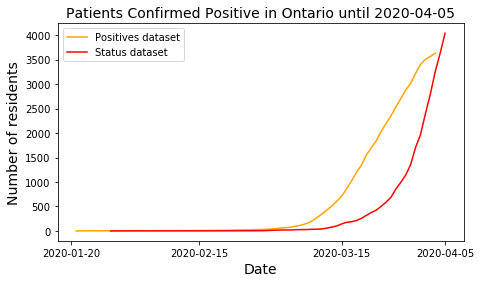

In [37]:
xticksOnt1 = ['2020-01-20', '2020-02-15','2020-03-15', lastdateOnt1]

f = plt.figure(figsize=(16,4))

ax1 = f.add_subplot(121)

ax1.plot(cases.index, cases.values, color='orange', label='Positives dataset')
ax1.plot(df1['date'], df1['totcases'], color='red', label='Status dataset')
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Patients Confirmed Positive in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax1.set_xticks(xticksOnt1)
ax1.legend();